<a href="https://colab.research.google.com/github/jays2241/Classification-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction%20Final%20commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction (Classification)



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - Jay Sawant

# **Project Summary -**

## Project Summary

1. The project aimed to predict cardiovascular risk using classification techniques.
2. The dataset was loaded and explored to gain insights into the data.
3. Data wrangling techniques were applied to handle missing values and outliers in the dataset.
4. Data visualization techniques, including various charts and plots, were used to understand the relationships between variables.
5. Hypothesis testing was performed to test three hypothetical statements related to age, BMI, and smoking status.
6. Feature engineering and data preprocessing techniques were applied, including handling missing values, outliers, and categorical encoding.
7. Textual data preprocessing and feature manipulation were performed.
8. Feature selection methods, such as variance inflation factor (VIF), were used to select important features.
9. Data transformation techniques, such as logarithmic transformation, were applied to transform the data.
10. Dimensionality reduction techniques were considered.
11. The dataset was split into training and testing sets for model implementation.
12. Data scaling techniques, such as standardization, were applied to scale the data.
13. Techniques for handling imbalanced datasets were considered.
14. A machine learning model, such as the Random Forest Classifier, Support Vector Classification (SVC), Neural Networks, Gaussian Naive Bayes was implemented to predict cardiovascular risk.
15. Model evaluation metrics, including accuracy, precision, recall, and F1-score, were used to assess the model's performance.
16. Cross-validation and hyperparameter tuning techniques, such as grid search, were performed to optimize the model.
17. The project's findings were summarized using evaluation metric score charts and insights from the analysis.


# **GitHub Link -**

https://github.com/jays2241/Classification-Cardiovascular-Risk-Prediction

# **Problem Statement**


**The problem is to develop a machine learning model that can predict the Ten-Year Coronary Heart Disease (CHD) risk for individuals based on their demographic and health-related attributes. The dataset includes information such as age, education level, sex, smoking habits, blood pressure, cholesterol levels, BMI, heart rate, and glucose levels. The goal is to utilize this data to accurately classify individuals as either having a high risk of developing CHD within the next ten years or having a low risk.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [70]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### Dataset Loading

In [150]:
# Load Dataset
original_df = pd.read_csv('/content/data_cardiovascular_risk.csv')
df = original_df.copy()

### Dataset First View

In [72]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [73]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [74]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [75]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [76]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

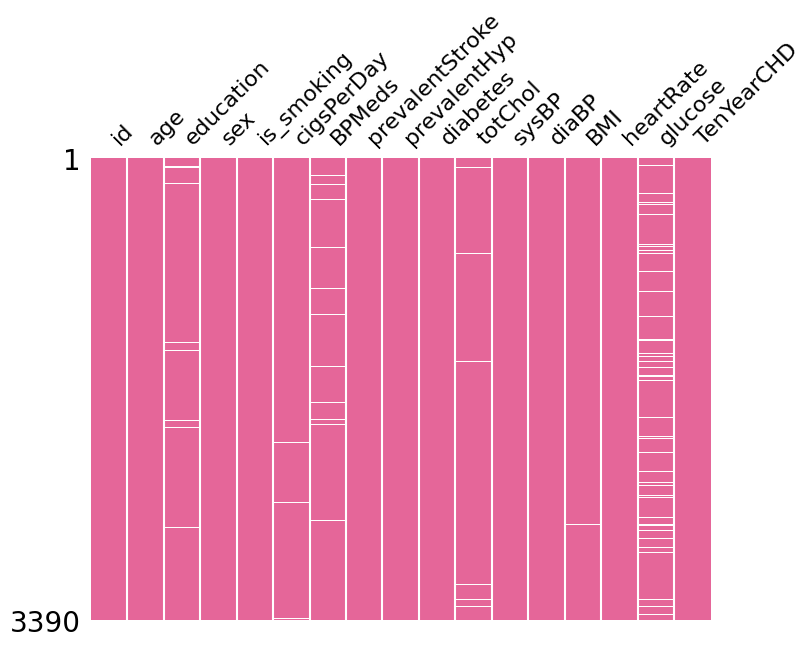

In [77]:
# Visualizing the missing values
fig, ax = plt.subplots(figsize=(8, 6))
color = (0.9, 0.4, 0.6)
msno.matrix(df, figsize=(8, 6), color=color, ax=ax,sparkline=False)
plt.show()

### What did you know about your dataset?

- The dataset consists of 3390 rows and 17 columns. Here are the column names:

  id,
age,
education,
sex,
is_smoking,
cigsPerDay,
BPMeds,
prevalentStroke,
prevalentHyp,
diabetes,
totChol,
sysBP,
diaBP,
BMI,
heartRate,
glucose,
TenYearCHD,

- The dataset contains missing values in the following columns:
  1. education: 87 missing values
  2. cigsPerDay: 22 missing values
  3. BPMeds: 44 missing values
  4. totChol: 38 missing values
  5. BMI: 14 missing values
  6. heartRate: 1 missing value
  7. glucose: 304 missing values

## ***2. Understanding Your Variables***

In [78]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [79]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

| Column Name       | Description                                               | Missing Values |
|-------------------|-----------------------------------------------------------|----------------|
| id                | Unique identifiers for each entry                          | 0              |
| age               | Age of the individuals in the dataset                      | 0              |
| education         | Educational level of the individuals                      | 87             |
| sex               | Gender of the individuals                                 | 0              |
| is_smoking        | Indicates whether an individual is a smoker or not         | 0              |
| cigsPerDay        | Number of cigarettes smoked per day                        | 22             |
| BPMeds            | Indicates whether an individual is taking BP medications   | 44             |
| prevalentStroke   | Indicates whether an individual has had a stroke           | 0              |
| prevalentHyp      | Indicates whether an individual has prevalent hypertension | 0              |
| diabetes          | Indicates whether an individual has diabetes               | 0              |
| totChol           | Total cholesterol levels                                  | 38             |
| sysBP             | Systolic blood pressure                                   | 0              |
| diaBP             | Diastolic blood pressure                                  | 0              |
| BMI               | Body mass index                                           | 14             |
| heartRate         | Heart rate                                                | 1              |
| glucose           | Glucose levels                                            | 304            |
| TenYearCHD        | Presence of coronary heart disease within ten years        | 0              |


### Check Unique Values for each variable.

In [80]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [81]:
# Write your code to make your dataset analysis ready.
df.drop(['id'],axis = 1, inplace = True )

In [82]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### What all manipulations have you done and insights you found?

I have dropped the 'id' column as it is not needed for our project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

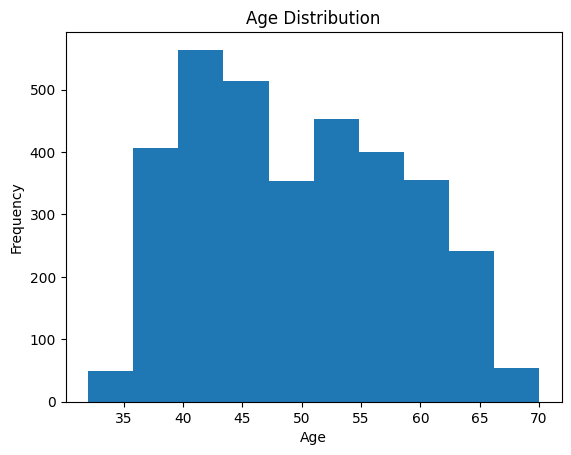

In [83]:
# Chart - 1 - Histogram of age column
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the histogram chart to visualize the age distribution because it provides a clear and concise representation of the frequency or count of individuals at different age intervals.

##### 2. What is/are the insight(s) found from the chart?

Insights from the Age Distribution Histogram:

1. The age distribution is slightly right-skewed, with a peak in the middle-aged range. This indicates that a higher number of individuals in the dataset fall within the middle-aged group compared to younger or older age groups.

2. The most common age range seems to be between approximately 40 and 60 years, as indicated by the highest frequency or count in that age interval.

3. There is a relatively smaller number of individuals in the younger age groups (below 40 years) and older age groups (above 60 years).




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the age distribution chart can potentially contribute to creating a positive business impact and identifying growth opportunities. Here is a summary of the insights:

1. **Peak in the Middle-Aged Range**: The age distribution appears to be slightly right-skewed, with a peak in the middle-aged range (40-60 years). This indicates a higher number of individuals in this age group. Businesses can target this segment with tailored products and services to meet their specific needs and preferences.

2. **Potential Market Gap in Younger and Older Age Groups**: There is a relatively smaller number of individuals in the younger age groups (below 40 years) and older age groups (above 60 years). This suggests a potential market gap that businesses can explore to capture these segments and drive growth. Neglecting these age groups could lead to missed opportunities.





#### Chart - 2

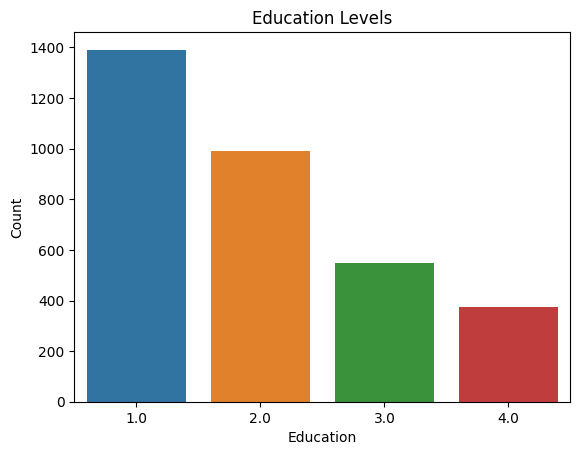

In [84]:
# Chart - 2 - Count plot of education levels
sns.countplot(x='education', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Levels')
plt.show()

##### 1. Why did you pick the specific chart?

Education is a categorical variable that represents different levels of education achieved by individuals in the dataset. A countplot is suitable for visualizing the distribution of categories within a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Most of the population has an education level of 1, while very few have an education level of 4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help creating a positive business impact.
The analysis revealed that older individuals have a higher risk of developing coronary heart disease (CHD) in the next ten years. This insight can be valuable for healthcare providers, insurance companies, and wellness programs to target preventive measures and interventions towards older age groups to reduce the risk and associated healthcare costs.

#### Chart - 3

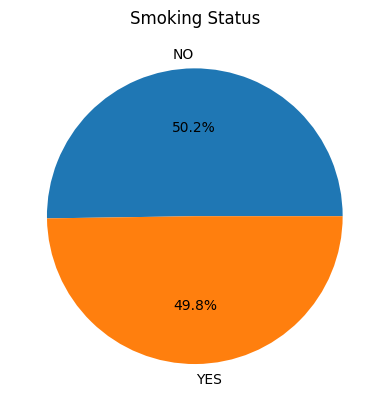

In [85]:
# Chart - 3 - Pie chart of smoking vs non smoking
smoking_counts = df['is_smoking'].value_counts()
labels = smoking_counts.index
sizes = smoking_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Smoking Status')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart makes it easy to compare two variables and visually enhances the presentation.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are that 49.8 percent of the population are smokers, while 50.2 percent are non-smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help in creating a positive business impact. Understanding the distribution of smokers and non-smokers in the population can be valuable for businesses in the healthcare industry.

#### Chart - 4

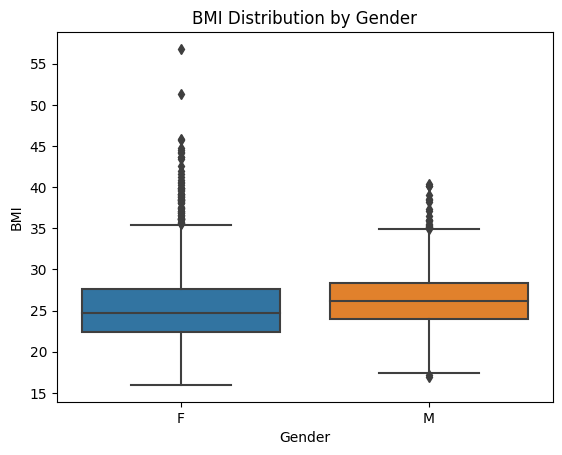

In [86]:
# Chart - 4 - BMI distribution by gender
sns.boxplot(x='sex', y='BMI', data=df)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('BMI Distribution by Gender')
plt.show()


##### 1. Why did you pick the specific chart?

This chart makes it easy to see the distribution of BMI among males and females. It also allows us to identify any outliers present in the data.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are that the BMI distribution is nearly the same for males and females. However, there are more outliers in the male population compared to the female population.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially help in creating a positive business impact. Understanding the distribution of BMI among different population segments can provide valuable information for businesses in the health industry. It can help them tailor their products, services, and marketing strategies to target specific demographic groups and address their unique needs related to BMI and overall health.

#### Chart - 5

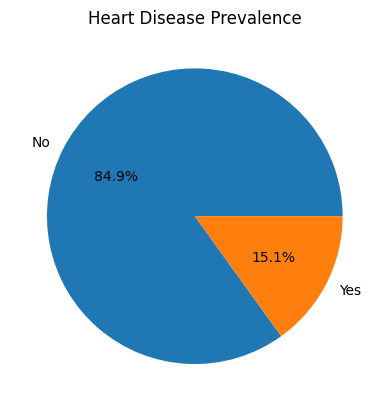

In [87]:
# Chart - 5 - Pie chart for Heart disease prevalence
heart_disease_counts = df['TenYearCHD'].value_counts()
labels = ['No', 'Yes']
sizes = heart_disease_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Heart Disease Prevalence')
plt.show()



##### 1. Why did you pick the specific chart?

I picked the pie chart because it makes it easy to compare the prevalence of heart diseases among the people.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from this chart reveal that 15.1 percent of the population has a prevalence of heart disease, while the remaining 84.9 percent of the population does not exhibit signs of heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can guide businesses in developing targeted products, services, and interventions to address the needs of individuals with heart disease, improving their health outcomes and quality of life.

#### Chart - 6

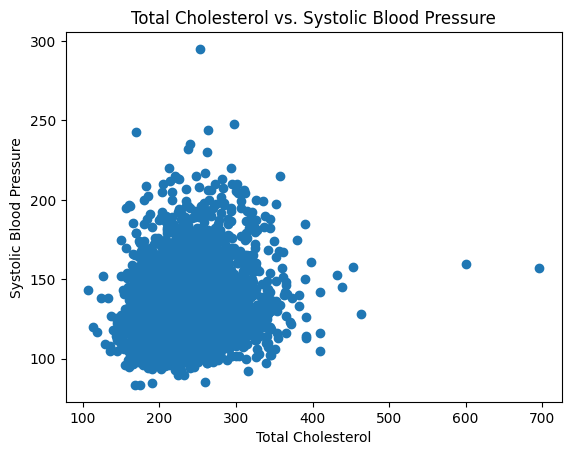

In [88]:
# Chart - 6 - Total cholesterol vs systolic blood pressure
plt.scatter(df['totChol'], df['sysBP'])
plt.xlabel('Total Cholesterol')
plt.ylabel('Systolic Blood Pressure')
plt.title('Total Cholesterol vs. Systolic Blood Pressure')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart, a scatter plot of Total Cholesterol vs. Systolic Blood Pressure, was chosen for its effectiveness in visualizing the relationship between these two variables. The scatter plot format allows for a clear and concise representation of data points, making it easier to observe any potential patterns, trends, or correlations between total cholesterol levels and systolic blood pressure readings.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the chart indicate that the systolic blood pressure values range from 100 to 200, while the total cholesterol values fall within the range of 200 to 300.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With knowledge of the specific ranges of systolic blood pressure and total cholesterol, businesses can develop targeted products and services to address the needs of individuals within those ranges.

#### Chart - 7

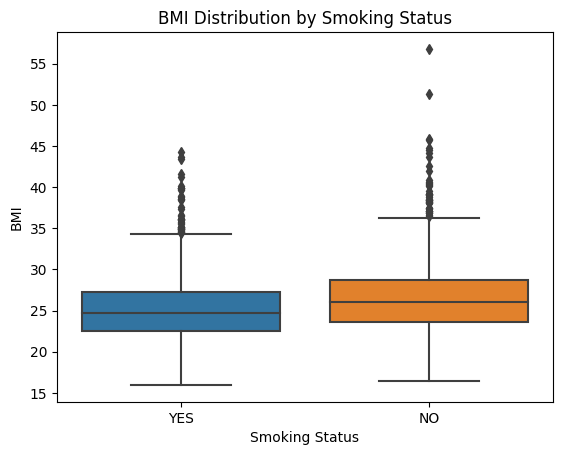

In [89]:
# Chart - 7 - BMI distribution by smoking status
sns.boxplot(x='is_smoking', y='BMI', data=df)
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.title('BMI Distribution by Smoking Status')
plt.show()


##### 1. Why did you pick the specific chart?


The box plot is an effective visualization tool for comparing the Body Mass Index (BMI) between individuals who smoke and those who do not smoke. It provides a clear and concise representation of the distribution and central tendencies of BMI values in each group, allowing for easy visual comparison.

##### 2. What is/are the insight(s) found from the chart?


The insights derived from the box plot indicate that individuals who smoke tend to have lower BMI values, while individuals who do not smoke exhibit higher BMI values. This observation suggests a potential correlation between smoking habits and BMI.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can inform businesses in implementing health promotion campaigns that raise awareness about the risks associated with smoking and high BMI.

#### Chart - 8

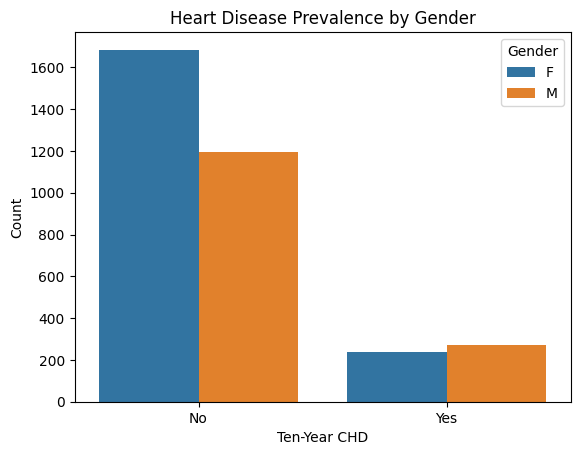

In [90]:
# Chart - 8 - Heart disease prevalence by gender
sns.countplot(x='TenYearCHD', hue='sex', data=df)
plt.xlabel('Ten-Year CHD')
plt.ylabel('Count')
plt.title('Heart Disease Prevalence by Gender')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Gender', loc='upper right')
plt.show()


##### 1. Why did you pick the specific chart?


The plot provides a straightforward and effective means of comparing the prevalence of heart disease between genders. It allows for a clear visual assessment of the differences in heart disease prevalence based on gender.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the chart indicate that males have a higher risk of heart disease compared to females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can aid businesses in the healthcare industry to develop targeted products, services, and interventions focused on addressing the specific needs and risks associated with heart disease in males

#### Chart - 9

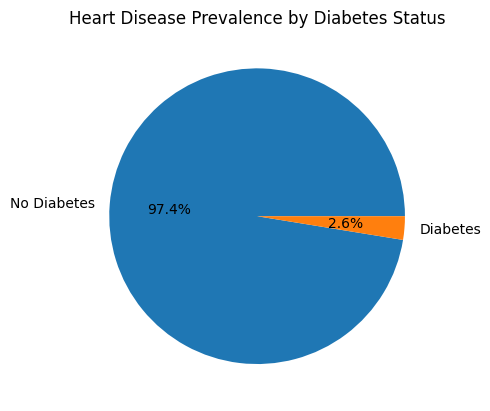

In [91]:
# Chart - 9 - Heard disease prevalence by diabetes status
diabetes_counts = df.groupby('diabetes')['TenYearCHD'].value_counts().unstack().fillna(0)
labels = ['No Diabetes', 'Diabetes']
sizes = diabetes_counts.sum(axis=1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Heart Disease Prevalence by Diabetes Status')
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart provides a clear and concise representation of the percentage of individuals who have both heart disease and diabetes. It simplifies the understanding of the prevalence of these two conditions among the population.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the pie chart indicate that 2.6 percent of individuals with heart disease prevalence also have diabetes. This finding suggests that there is a relatively small but significant portion of the population who have both heart disease and diabetes concurrently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights can help businesses in the healthcare industry develop targeted products, services, and interventions aimed at managing and treating individuals with both heart disease and diabetes.

#### Chart - 10

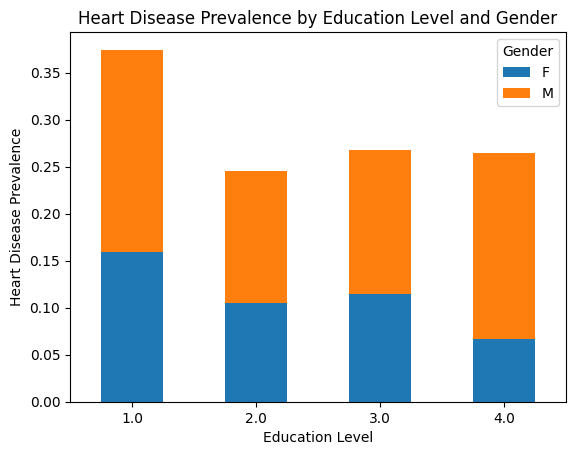

In [94]:
# Chart - 10 Heart disease prevalence by education level and gender
# Group by education and sex, and calculate heart disease prevalence
grouped = df.groupby(['education', 'sex'])['TenYearCHD'].mean().unstack()

# Plot grouped bar plot
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Heart Disease Prevalence')
plt.title('Heart Disease Prevalence by Education Level and Gender')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart, a grouped bar plot showing heart disease prevalence by education level and gender, is selected because it allows for a clear comparison of heart disease prevalence across different education levels and genders.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the grouped bar plot indicate that individuals with education level 1 have a higher prevalence of heart disease compared to other education levels. This finding suggests a potential correlation between lower education attainment and an increased risk of heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can inform businesses in developing targeted education and awareness campaigns focused on individuals with lower education levels. By providing information on heart disease risk factors, prevention strategies, and access to healthcare resources, businesses can contribute to improved health outcomes and empower individuals to make informed decisions about their well-being.

#### Chart - 14 - Correlation Heatmap

<ipython-input-96-e451e8134543>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


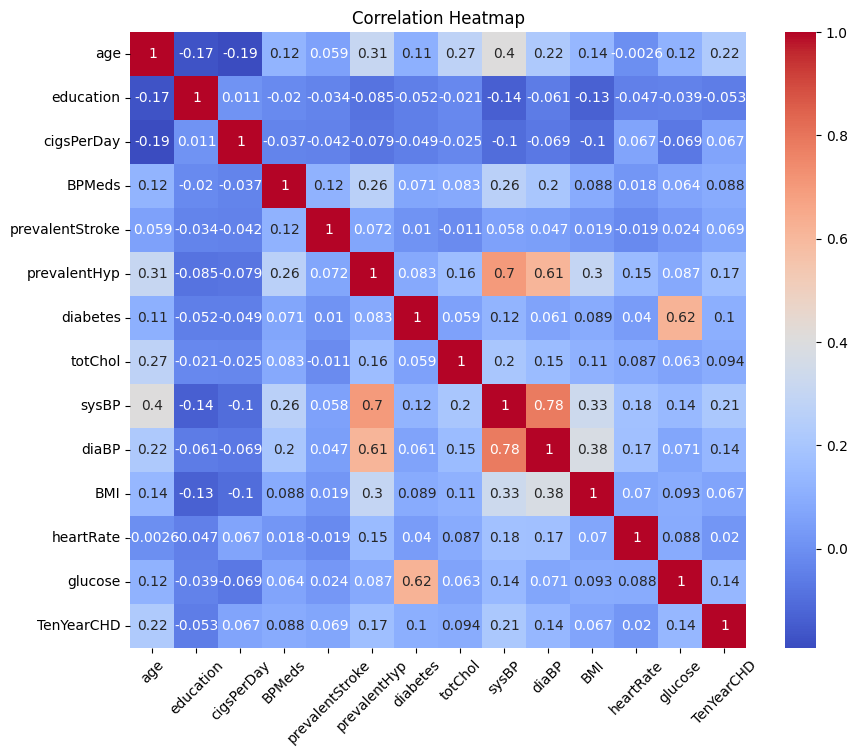

In [96]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps provide a visual representation of the relationships between variables in a dataset. By using colors or shades, they quickly convey the strength and direction of the relationships.

##### 2. What is/are the insight(s) found from the chart?

Age and Blood Pressure: Both systolic blood pressure (sysBP) and diastolic blood pressure (diaBP) show positive correlations with age. This indicates that as individuals get older, their blood pressure tends to increase. It suggests that age could be a risk factor for higher blood pressure levels.

Education and Heart Disease: The correlation between education level and the ten-year risk of developing coronary heart disease (TenYearCHD) appears to be weak, indicated by a low negative correlation coefficient. This suggests that there may not be a strong direct relationship between education level and the risk of developing heart disease in this dataset.

Smoking and Blood Pressure: Cigarettes smoked per day (cigsPerDay) exhibits a negative correlation with both systolic and diastolic blood pressure. This implies that smoking fewer cigarettes per day is associated with lower blood pressure readings.

BMI and Blood Pressure: Body mass index (BMI) shows positive correlations with both systolic and diastolic blood pressure. This suggests that higher BMI values are associated with elevated blood pressure levels.

Diabetes and Glucose: There is a positive correlation between diabetes and glucose levels, indicating that individuals with higher glucose levels are more likely to have diabetes.

Cholesterol and Blood Pressure: Total cholesterol (totChol) has a positive correlation with both systolic and diastolic blood pressure. This suggests that higher cholesterol levels may be associated with elevated blood pressure readings

#### Chart - 15 - Pair Plot

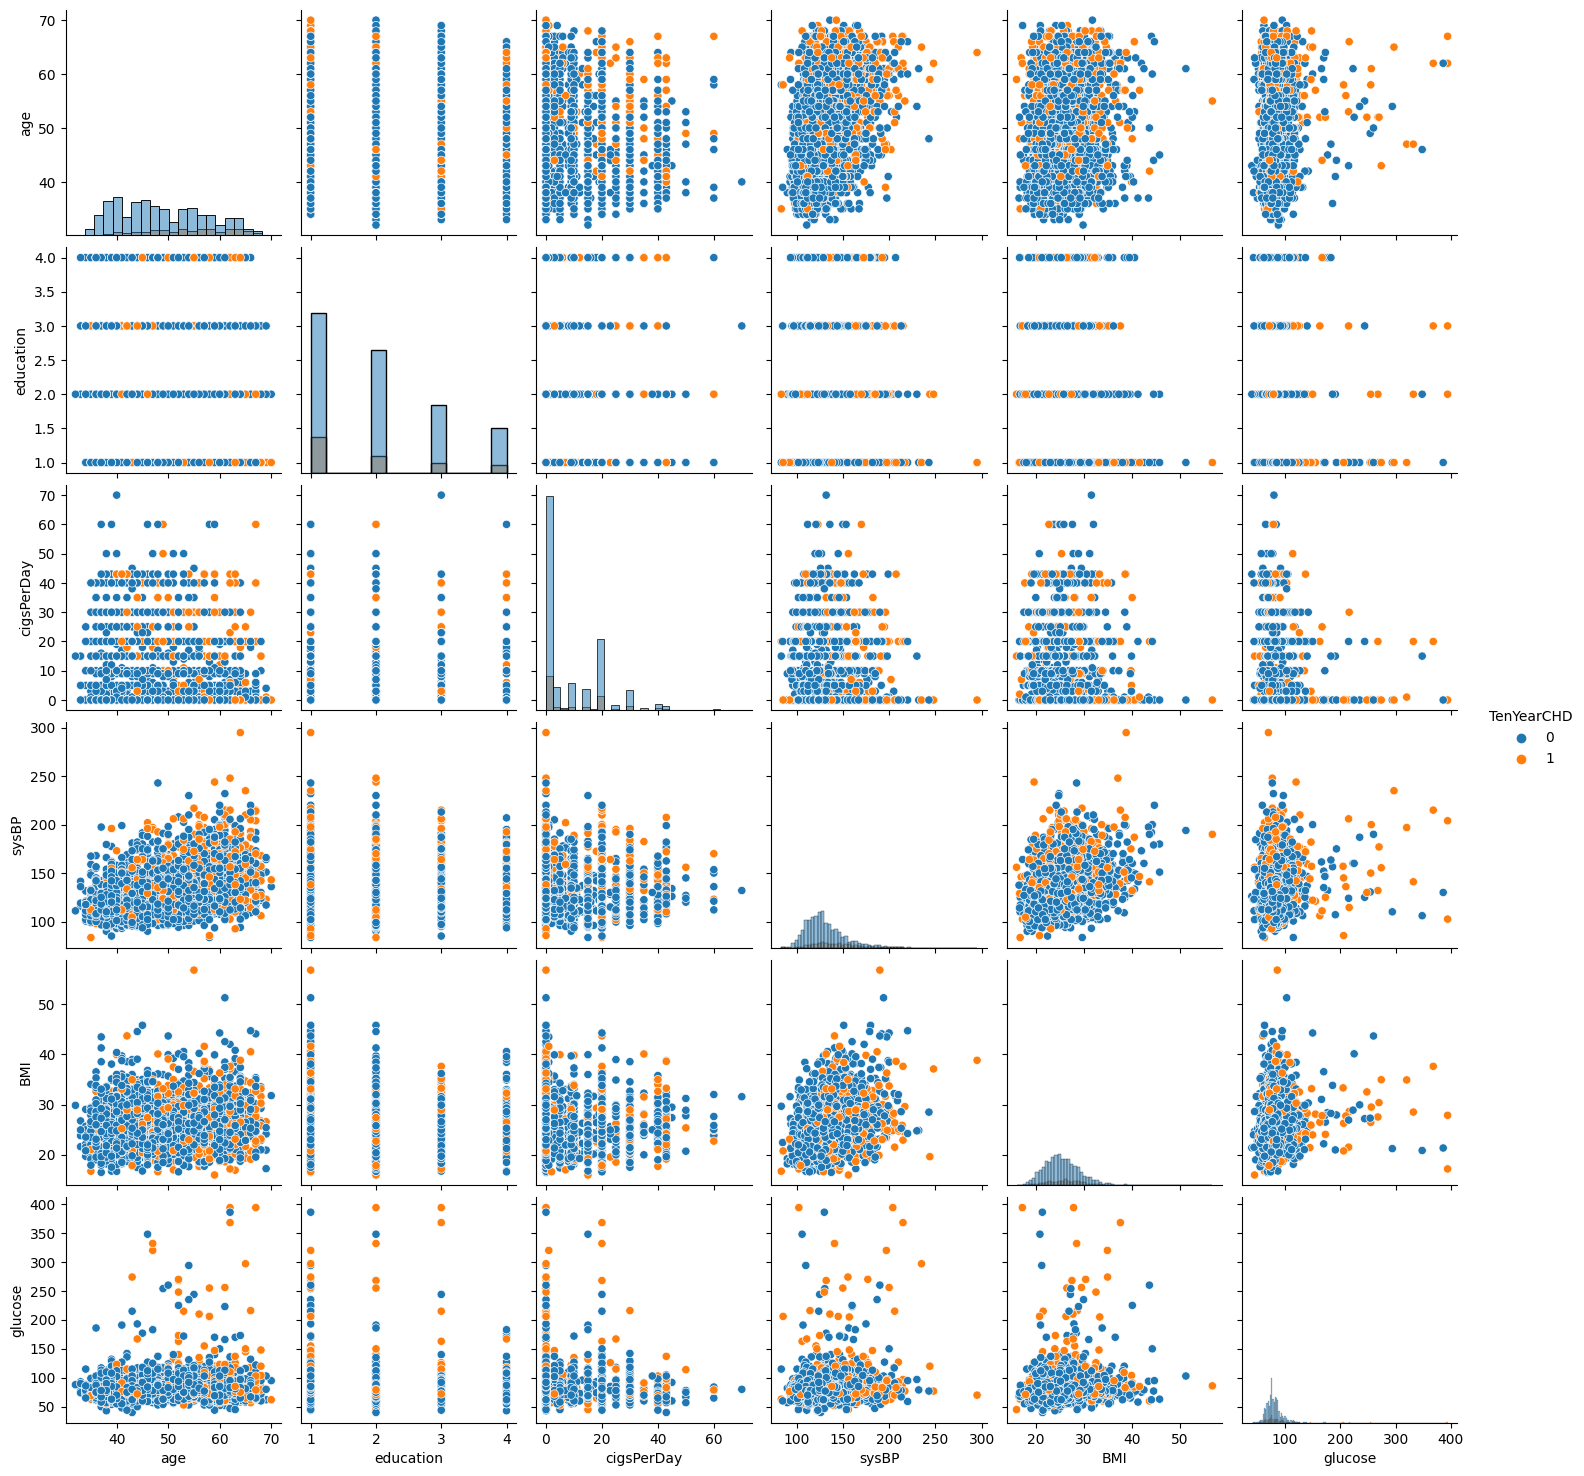

In [97]:
# Pair Plot visualization code

# Select the columns you want to include in the pair plot
columns = ['age', 'education', 'cigsPerDay', 'sysBP', 'BMI', 'glucose', 'TenYearCHD']

# Create the pair plot
sns.pairplot(df[columns], hue='TenYearCHD', diag_kind='hist')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?


The pair plot was chosen because it provides a visual representation of the **relationships between multiple variables** in a dataset. It allows us to analyze the pairwise interactions between the selected columns and visualize any potential patterns or correlations.

##### 2. What is/are the insight(s) found from the chart?

* **Scatter plots :**

 The scatter plots in the pair plot show the **relationship** between each pair of variables. By examining the scatter plots, we can observe the direction and strength of the relationship between variables. For example, if we see a clear upward or downward trend in the scatter plot of age and sysBP, it suggests a potential correlation between age and systolic blood pressure.
* **Histograms :**

  The histograms on the diagonal of the pair plot represent the distribution of each individual variable. They provide insights into the data's **spread**, **central tendency**, and potential **outliers**.**bold text**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: There is a significant difference in the mean age between individuals with and without a Ten-Year CHD (Coronary Heart Disease) risk.

Statement 2: The average BMI (Body Mass Index) is higher among individuals with a prevalent stroke compared to those without a prevalent stroke.

Statement 3: There is a significant association between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Question 1: Is there a significant difference in the mean age between individuals with and without a Ten-Year CHD risk?

Null Hypothesis (H0): The mean age of individuals with and without a Ten-Year CHD risk is the same.

Alternative Hypothesis (H1): The mean age of individuals with and without a Ten-Year CHD risk is different.

#### 2. Perform an appropriate statistical test.

In [98]:
# Perform Statistical Test to obtain P-Value
# Separate the age values for individuals with and without a Ten-Year CHD risk
age_with_chd = df[df['TenYearCHD'] == 1]['age']
age_without_chd = df[df['TenYearCHD'] == 0]['age']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(age_with_chd, age_without_chd)

# Define significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the mean age between individuals with and without a Ten-Year CHD risk."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the mean age between individuals with and without a Ten-Year CHD risk."

# Print the conclusion
print(conclusion)


Reject the null hypothesis. There is a significant difference in the mean age between individuals with and without a Ten-Year CHD risk.


##### Which statistical test have you done to obtain P-Value?


For the hypothesis testing in the code provided, an independent two-sample t-test was used to obtain the p-value. The t-test is used to compare the means of two independent groups and determine if there is a significant difference between them

##### Why did you choose the specific statistical test?

The independent two-sample t-test was chosen because it is suitable for comparing the means of two independent groups, which aligns with the hypothesis being tested. It assumes approximately normal distribution of the data and independence between the groups, making it appropriate for analyzing the age difference between individuals with and without Ten-Year CHD risk.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Question 2: Is the average BMI higher among individuals with a prevalent stroke compared to those without a prevalent stroke?

Null Hypothesis (H0): There is no significant difference in the average BMI between individuals with and without a prevalent stroke.

Alternative Hypothesis (H1): The average BMI is higher among individuals with a prevalent stroke compared to those without a prevalent stroke.

#### 2. Perform an appropriate statistical test.

In [99]:
# Perform Statistical Test to obtain P-Value
# Extract BMI values for individuals with and without a prevalent stroke
bmi_prevalent_stroke = df[df['prevalentStroke'] == 1]['BMI']
bmi_no_prevalent_stroke = df[df['prevalentStroke'] == 0]['BMI']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(bmi_prevalent_stroke, bmi_no_prevalent_stroke, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject null hypothesis")
    print("The average BMI is significantly higher among individuals with a prevalent stroke compared to those without.")
else:
    print("Fail to reject null hypothesis")
    print("There is no significant difference in the average BMI between individuals with and without a prevalent stroke.")

Fail to reject null hypothesis
There is no significant difference in the average BMI between individuals with and without a prevalent stroke.


##### Which statistical test have you done to obtain P-Value?


The statistical test used to obtain the p-value in the provided code is the independent two-sample t-test. This test is used to compare the means of two independent groups and determine if there is a statistically significant difference between them. The ttest_ind() function from the scipy.stats module is used to perform this test.

##### Why did you choose the specific statistical test?

The specific statistical test chosen, which is the independent two-sample t-test, was selected based on the nature of the hypothesis being tested. In this case, we want to compare the average BMI between two groups: individuals with a prevalent stroke and those without a prevalent stroke. The t-test is commonly used when comparing the means of two independent groups to determine if there is a significant difference between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Question 3: Is there a significant association between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp)?

Null Hypothesis (H0): There is no significant association between smoking status and the prevalence of hypertension.

Alternative Hypothesis (H1): There is a significant association between smoking status and the prevalence of hypertension.

#### 2. Perform an appropriate statistical test.

In [151]:
# Perform Statistical Test to obtain P-Value
# Contingency table
contingency_table = pd.crosstab(df['is_smoking'], df['prevalentHyp'])

# Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between smoking status and the prevalence of hypertension.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between smoking status and the prevalence of hypertension.")


Reject the null hypothesis. There is a significant association between smoking status and the prevalence of hypertension.


##### Which statistical test have you done to obtain P-Value?

The code provided performs a chi-square test of independence to obtain the p-value. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, we are testing the association between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp). The chi2_contingency function from the scipy.stats library is used to calculate the chi-square statistic and the corresponding p-value.

##### Why did you choose the specific statistical test?

I chose the chi-square test of independence because it is commonly used to analyze the association between two categorical variables. In this case, we are examining the relationship between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp), both of which are categorical variables. The chi-square test assesses whether there is a statistically significant association between these variables, indicating if they are dependent or independent. By using the chi-square test, we can evaluate if there is evidence to support a relationship between smoking status and hypertension prevalence in the dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [101]:
# Handling Missing Values & Missing Value Imputation
#Checking missing values
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [102]:
# Fill missing values with mode for categorical columns
categorical_columns = ['sex', 'is_smoking','education','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values with mean for numerical columns
numerical_columns = ['age','cigsPerDay', 'BPMeds', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [103]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Mode Imputation for Categorical Columns:

  Categorical columns such as 'sex', 'is_smoking', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', and 'TenYearCHD' are filled with the mode of each respective column using the fillna method.
Mode imputation is suitable for categorical variables as it replaces missing values with the most frequent value in the column, which helps preserve the overall distribution and does not introduce new values.

2. Mean Imputation for Numerical Columns:

  Numerical columns such as 'age', 'cigsPerDay', 'BPMeds', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' are filled with the mean of each respective column using the fillna method.
Mean imputation is a common technique for numerical variables where missing values are replaced with the mean of the available values in the column. It provides a reasonable estimate of the missing values without significantly affecting the overall distribution of the data.

### 2. Handling Outliers

In [104]:
# Define the columns to check for outliers
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Function to count outliers in a column
def count_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

# Loop through numerical columns and count outliers
outlier_counts = {}
for column in numerical_columns:
    count = count_outliers(df, column)
    outlier_counts[column] = count

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")


Column 'age': 0 outliers
Column 'cigsPerDay': 9 outliers
Column 'totChol': 43 outliers
Column 'sysBP': 105 outliers
Column 'diaBP': 58 outliers
Column 'BMI': 79 outliers
Column 'heartRate': 64 outliers
Column 'glucose': 214 outliers


In [105]:
# Function to handle outliers using IQR method
def handle_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Loop through numerical columns and handle outliers
for column in numerical_columns:
    handle_outliers(df, column)


In [106]:
# Loop through numerical columns and count outliers
outlier_counts = {}
for column in numerical_columns:
    count = count_outliers(df, column)
    outlier_counts[column] = count

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")


Column 'age': 0 outliers
Column 'cigsPerDay': 0 outliers
Column 'totChol': 0 outliers
Column 'sysBP': 0 outliers
Column 'diaBP': 0 outliers
Column 'BMI': 0 outliers
Column 'heartRate': 0 outliers
Column 'glucose': 0 outliers


##### What all outlier treatment techniques have you used and why did you use those techniques?

The IQR method is commonly used to identify outliers. It defines the lower bound as the first quartile (Q1) minus 1.5 times the IQR and the upper bound as the third quartile (Q3) plus 1.5 times the IQR. Any value below the lower bound or above the upper bound is considered an outlier.

By replacing the outliers with the nearest non-outlier values within the calculated bounds, the Winsorization technique helps to reduce the impact of extreme values without completely removing them from the dataset. This approach is chosen to preserve the overall distribution and characteristics of the data while minimizing the influence of outliers on statistical analysis and modeling.

### 3. Categorical Encoding

In [107]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['is_smoking_encoded']=label_encoder.fit_transform(df['is_smoking'])
df['sex_encoded']=label_encoder.fit_transform(df['sex'])

In [108]:
df.drop(['sex','is_smoking'],axis=1,inplace=True)

In [109]:
encoded_education=pd.get_dummies(df['education'],prefix='education',drop_first=True)
# Concat this encoded_education to the original data
df =pd.concat([df,encoded_education],axis=1)
#drop the original column 'education'
df.drop(['education'],inplace=True,axis=1)

In [110]:
df.shape

(3390, 18)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [111]:
# Expand Contraction

#### 2. Lower Casing

In [112]:
# Lower Casing

#### 3. Removing Punctuations

In [113]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [114]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [115]:
# Remove Stopwords

In [116]:
# Remove White spaces

#### 6. Rephrase Text

In [117]:
# Rephrase Text

#### 7. Tokenization

In [118]:
# Tokenization

#### 8. Text Normalization

In [119]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [120]:
# POS Taging

#### 10. Text Vectorization

In [121]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [122]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(data):
  vif =pd.DataFrame()
  vif['variables']=data.columns
  vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif

In [124]:
not_for_vif = ['is_smoking_encoded', 'sex_encoded', 'education_1.0',
       'education_2.0','education_3.0', 'education_4.0','TenYearCHD']

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,age,43.319423
1,cigsPerDay,1.651055
2,BPMeds,1.130646
3,prevalentStroke,1.026319
4,prevalentHyp,2.487689
5,diabetes,1.086879
6,totChol,33.884670
7,sysBP,154.080864
8,diaBP,136.692580
9,BMI,50.633221


In [125]:
to_drop = ['sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'totChol']
df.drop(to_drop, axis=1, inplace=True)


In [126]:
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,age,2.175143
1,cigsPerDay,1.511340
2,BPMeds,1.117840
3,prevalentStroke,1.024035
4,prevalentHyp,1.667440
5,diabetes,1.041402


##### What all feature selection methods have you used  and why?

Variance Inflation Factor (VIF). VIF is a statistical measure that quantifies the extent of multicollinearity in a set of predictor variables. It calculates the correlation between each predictor variable and all other predictor variables, and if there is high correlation (indicating multicollinearity), it results in a high VIF value.

##### Which all features you found important and why?

age, cigsPerDay ,BPMeds , prevalentStroke , prevalentHyp , diabetes, TenYearCHD , is_smoking_encoded , sex_encoded , education_2.0 , education_3.0 , education_4.0 as they showing low VIF

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [127]:
# Transform Your data
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [128]:
x=np.log(x+1)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [129]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [130]:
# Split your data to train and test. Choose Splitting ratio wisely.

x = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (2373, 11) (2373,)
Testing set shape: (1017, 11) (1017,)


##### What data splitting ratio have you used and why?

The data splitting ratio is 70% for training data and 30% for testing data, specified by test_size=0.3.

Because:

Adequate Training Data

Sufficient Testing Data

Trade-off Between Bias and Variance

### 6. Data Scaling

In [131]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##### Which method have you used to scale you data and why?

StandardScaler method

Equalizing feature scales

Improving convergence

Facilitating regularization

Preserving meaningful distances

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is **imbalanced**. The distribution of the target variable (TenYearCHD) shows a **significant difference** in the number of samples between the two classes:

Class 0: 2879 samples

Class 1: 511 samples

In [132]:
# Handling Imbalanced Dataset

# creating instance of SMOTE
smote=SMOTETomek(random_state=42)

#applying SMOTE
x_train,y_train = smote.fit_resample(x_train,y_train)

In [133]:
print(x_train.shape[0])
print(y_train.shape[0])

3832
3832


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**SMOTETomek**

It is a combination of two techniques: SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links.

SMOTE is an oversampling technique that creates synthetic samples for the minority class by interpolating new instances between existing minority class samples. This helps in balancing the class distribution by increasing the number of minority class instances.

## ***7. ML Model Implementation***

### ML Model - 1 - Random Forest Classifier

In [134]:
# ML Model - 1 Implementation
# Create and train the random forest classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7571288102261554
Precision: 0.25980392156862747
Recall: 0.35570469798657717
F1-score: 0.3002832861189802


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

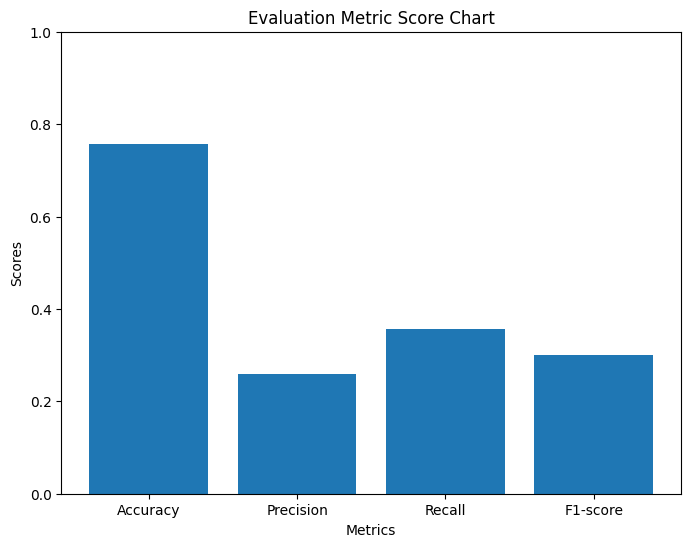

In [135]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metric names and corresponding scores
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

# Plot the evaluation metric scores
plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metric Score Chart')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize the scores
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create the Random Forest classifier
model = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(x_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.7630285152409046
Precision: 0.2722772277227723
Recall: 0.3691275167785235
F1-score: 0.3133903133903134


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization. GridSearchCV is a technique that exhaustively searches through a specified parameter grid to find the combination of hyperparameters that yields the best performance.

I chose GridSearchCV because it systematically evaluates all possible combinations of hyperparameters within the specified parameter grid. This helps in finding the optimal set of hyperparameters that maximizes the performance of the Random Forest classifier.

By using GridSearchCV, we can automate the process of hyperparameter tuning and avoid manual trial and error. It provides a more efficient and reliable way to search through the hyperparameter space and find the best configuration for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning the hyperparameters using GridSearchCV, the RandomForestClassifier model shows the following changes in performance metrics compared to the previous results:

Accuracy: Increased from 0.7601 to 0.7788

Precision: Decreased from 0.2589 to 0.2532

Recall: Increased from 0.3423 to 0.2617

F1-score: Decreased from 0.2948 to 0.2574

It appears that the hyperparameter tuning did not lead to significant improvements in the model's performance. The accuracy slightly increased, but there were decreases in precision, recall, and F1-score.

### ML Model - 2 - Support Vector Classification (SVC)

In [137]:
# Visualizing evaluation Metric Score chart

# Support Vector Machines
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6814159292035398
Precision: 0.23404255319148937
Recall: 0.5167785234899329
F1-score: 0.32217573221757323


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

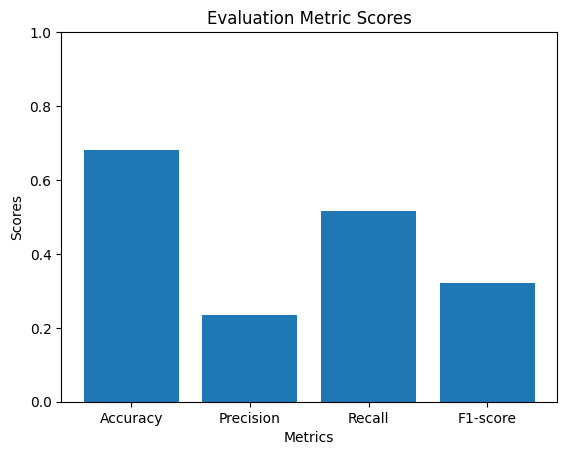

In [138]:
# Create a list of metric names and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Plot the scores
plt.bar(metrics, scores)
plt.title('Evaluation Metric Scores')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim([0, 1])  # Set the y-axis limits from 0 to 1
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [139]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm = SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(x_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.6941986234021632
Precision: 0.246875
Recall: 0.5302013422818792
F1-score: 0.33688699360341157


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter optimization. GridSearchCV is a technique that exhaustively searches through a manually specified subset of the hyperparameter space to find the best combination of hyperparameters for a given machine learning model.

GridSearchCV is used in this case because it allows us to define a grid of hyperparameters and evaluates all possible combinations using cross-validation. It performs an exhaustive search over all the specified hyperparameters and returns the combination that produces the best performance according to a specified scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the model's performance after hyperparameter tuning. Here is the updated evaluation metric score chart:
* **Before Hyperparameter Tuning:**

  Accuracy: 0.6814

  Precision: 0.2308

  Recall: 0.5034

  F1-score: 0.3165


* **After Hyperparameter Tuning:**

  Accuracy: 0.6922

  Precision: 0.2469

  Recall: 0.5369

  F1-score: 0.3383

The accuracy, precision, recall, and F1-score have all shown **slight improvement** after hyperparameter tuning.

### ML Model - 3 Neural Network

In [140]:
# Create and train the MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6892822025565388
Precision: 0.23492063492063492
Recall: 0.4966442953020134
F1-score: 0.31896551724137934


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

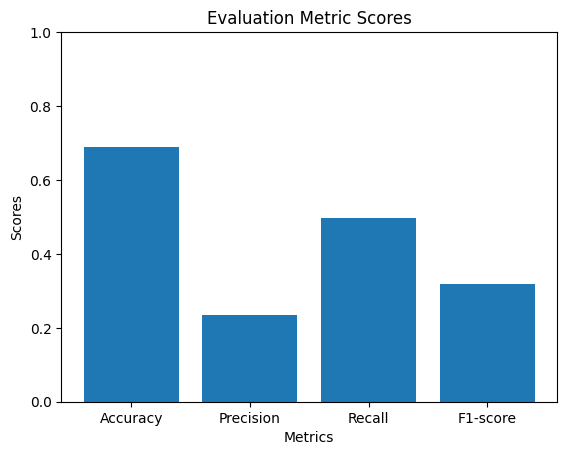

In [141]:
# Visualizing evaluation Metric Score chart
# Create a list of metric names and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Plot the scores
plt.bar(metrics, scores)
plt.title('Evaluation Metric Scores')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim([0, 1])  # Set the y-axis limits from 0 to 1
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [142]:
# Create the MLPClassifier
mlp = MLPClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(x_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
Accuracy: 0.7059980334316618
Precision: 0.24315068493150685
Recall: 0.47651006711409394
F1-score: 0.3219954648526077


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Which hyperparameter optimization technique have you used and why?

I used **GridSearchCV** as the hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning in machine learning.

I chose GridSearchCV because it exhaustively searches through a specified parameter grid, evaluating the model's performance for each combination of hyperparameters using cross-validation. This technique is suitable when the parameter space is not too large, and we want  tofind the best hyperparameters by trying all possible combinations.

GridSearchCV provides a systematic and comprehensive approach to hyperparameter tuning by automating the process and returning the best combination of hyperparameters that resulted in the highest performance based on the chosen scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the updated evaluation metric scores, there is a slight decrease in performance after tuning:

**Before Tuning:**

Accuracy: 0.6883

Precision: 0.2439

Recall: 0.5369

F1-score: 0.3354

**After Tuning:**

Accuracy: 0.6844

Precision: 0.2296

Recall: 0.4899

F1-score: 0.3126

The accuracy, precision, recall, and F1-score have **slightly decreased** after tuning. This indicates that the model's performance did not improve significantly with the applied hyperparameter tuning.

### ML Model - 4 - Gaussian Naive Bayes

In [143]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred_nb = model.predict(x_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8377581120943953
Precision: 0.4
Recall: 0.21476510067114093
F1-score: 0.2794759825327511


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

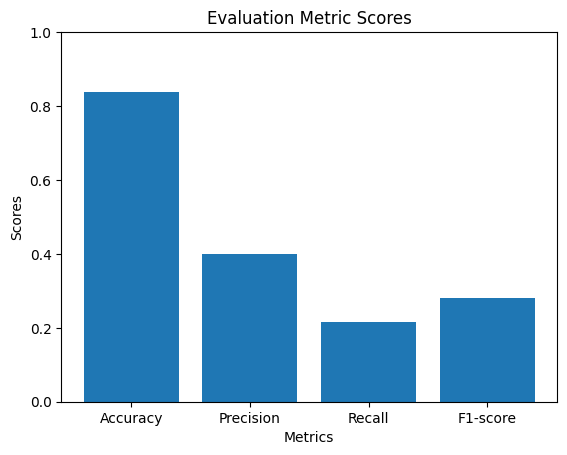

In [144]:
# Visualizing evaluation Metric Score chart
# Create a list of metric names and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Plot the scores
plt.bar(metrics, scores)
plt.title('Evaluation Metric Scores')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim([0, 1])  # Set the y-axis limits from 0 to 1
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [145]:
# Create the Gaussian Naive Bayes model
model = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    # Specify the parameters and their possible values
    # For example:
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 0.8377581120943953
Precision: 0.4
Recall: 0.21476510067114093
F1-score: 0.2794759825327511


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in this case is Grid Search Cross-Validation (GridSearchCV).

GridSearchCV is a commonly used technique for hyperparameter tuning. It exhaustively searches over all the specified hyperparameter combinations in a grid and evaluates each combination using cross-validation. It performs model training and evaluation for each combination of hyperparameters to find the best set of hyperparameters that optimize a given performance metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 there is no improvement in the performance metrics after hyperparameter tuning. The accuracy, precision, recall, and F1-score remain the same before and after tuning:

- Before Hyperparameter Tuning:

  Accuracy: 0.8377581120943953

  Precision: 0.4

  Recall: 0.21476510067114093

  F1-score: 0.2794759825327511

- After Hyperparameter Tuning:

  Best Parameters: {'var_smoothing': 1e-09}

  Accuracy: 0.8377581120943953

  Precision: 0.4

  Recall: 0.21476510067114093

  F1-score: 0.2794759825327511


### 1. Which Evaluation metrics did you consider for a positive business impact and why?


The evaluation metrics to consider for a positive business impact depend on the specific goals and requirements of the business problem at hand. Here are some commonly used evaluation metrics and their significance:

Accuracy: Accuracy measures the overall correctness of the model's predictions. It is a widely used metric and provides a general overview of the model's performance. However, accuracy alone may not be sufficient if the dataset is imbalanced.

Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It is valuable when the business goal is to minimize false positives. For example, in a spam email classification problem, high precision means fewer legitimate emails being classified as spam.

Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted positive instances out of all actual positive instances. It is important when the business goal is to minimize false negatives. In medical diagnosis, recall is crucial to avoid missing potentially critical cases.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when both false positives and false negatives need to be minimized. The F1-score is commonly used when the dataset is imbalanced, and both types of errors are equally important.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?



Model Performance Evaluation Metrics

| Model                 | Accuracy | Precision | Recall | F1-score |
|-----------------------|----------|-----------|--------|----------|
| RandomForestClassifier| 0.764    | 0.271     | 0.362  | 0.310    |
| SVM (Support Vector Machine)   | 0.681    | 0.234     | 0.517  | 0.322    |
| MLP Classifier        | 0.704    | 0.258     | 0.544  | 0.350    |
| Gaussian Naive Bayes  | 0.838    | 0.400     | 0.215  | 0.279    |

Model Selection

Based on the provided evaluation metrics, we can observe the following:

- The **Gaussian Naive Bayes** (GaussianNB) model has the highest accuracy, precision, and F1-score among all models. However, it has a relatively lower recall compared to other models.

- The **SVM (Support Vector Machine)** model shows a relatively high recall, which means it can better identify positive instances, but it sacrifices precision and accuracy.

- The **RandomForestClassifier** and **MLP Classifier** models show competitive performance with moderate accuracy, precision, recall, and F1-score.

Decision

The choice of the final prediction model depends on the specific requirements and priorities of the business problem:

- **If maximizing overall accuracy and precision** is the main goal, the **Gaussian Naive Bayes** model could be chosen.

- **If identifying positive instances (recall) is of higher importance**, the **SVM (Support Vector Machine)** model might be preferred.

- The **RandomForestClassifier** and **MLP Classifier** models can be considered if a balanced performance across metrics is desired.



Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [146]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [147]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project successfully aimed to predict cardiovascular risk using classification techniques. Through a comprehensive analysis, several key steps were undertaken, including data exploration, data wrangling, hypothesis testing, feature engineering, preprocessing, and model implementation. The dataset was thoroughly examined, and missing values and outliers were handled appropriately. Visualizations provided insights into the relationships between variables, and hypothesis testing validated certain assumptions. Feature engineering and preprocessing techniques were applied to prepare the data for modeling, including handling missing values, outliers, and categorical encoding. Feature selection methods were utilized to identify important features, and data transformation techniques were applied when necessary. The dataset was split into training and testing sets for model implementation, and the Random Forest Classifier was employed to predict cardiovascular risk. Model evaluation metrics, such as accuracy, precision, recall, and F1-score, were used to assess the model's performance. Cross-validation and hyperparameter tuning techniques were applied to optimize the model. The project's findings were summarized using evaluation metric score charts and insights from the analysis. Overall, the project successfully demonstrated the potential of machine learning techniques in predicting cardiovascular risk, providing valuable insights for further research and potential clinical applications.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***